<a href="https://colab.research.google.com/github/fanger2791/College-Tuition-and-Income-Inequality/blob/main/INF412_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 3 - Question 1

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5   

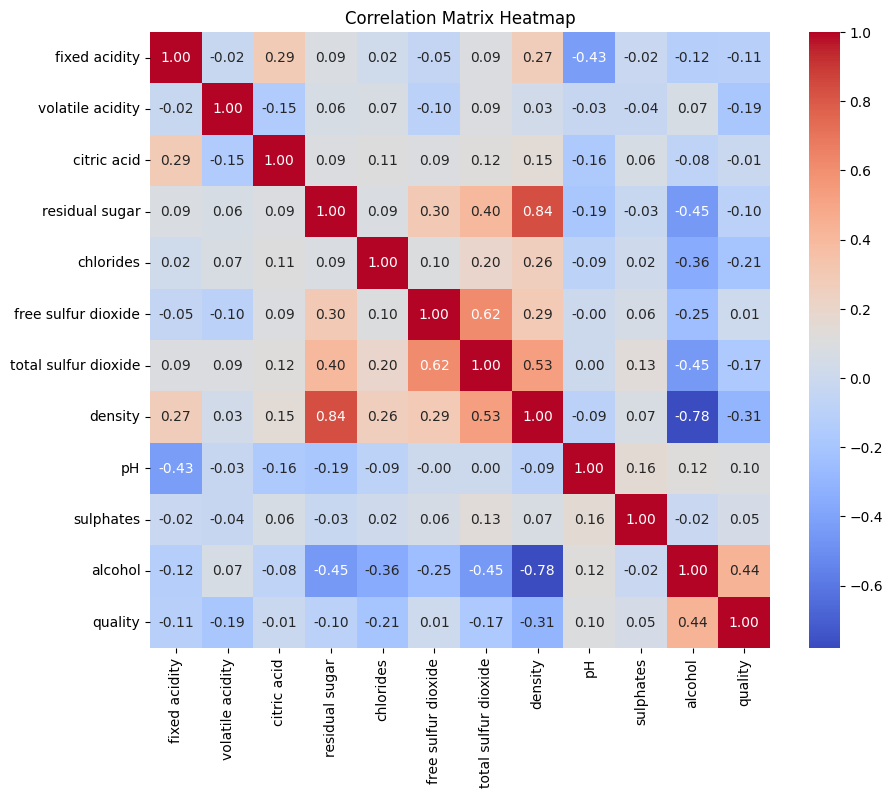


Model Coefficients:
[ 4.59072370e-02 -1.91488432e+00 -6.13034698e-02  7.12395507e-02
 -2.64751329e-02  5.11945372e-03 -2.42153962e-04 -1.24264125e+02
  6.00699854e-01  6.49072780e-01  2.29008684e-01]
Intercept: 124.39391498452245

Adjusted R² (Train): 0.282
Adjusted R² (Test): 0.257
MSE: 0.569
RMSE: 0.754


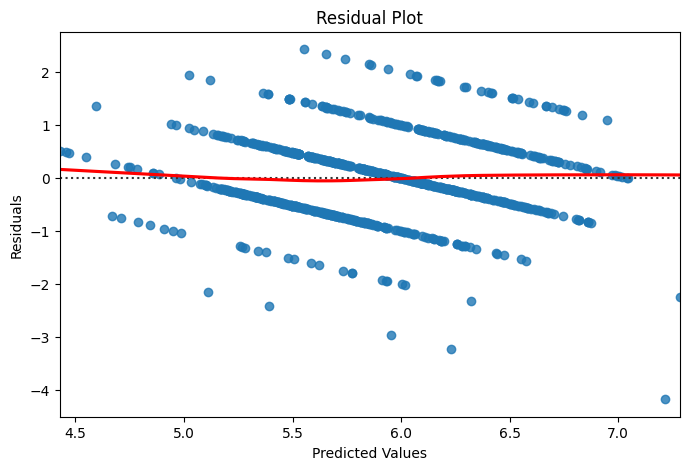


Variance Inflation Factor:
                 Feature          VIF
0          fixed acidity    92.861483
1       volatile acidity     9.730569
2            citric acid    10.007114
3         residual sugar     3.830272
4              chlorides     6.497448
5    free sulfur dioxide     9.261556
6   total sulfur dioxide    24.980802
7                density  1056.497431
8                     pH   609.861725
9              sulphates    20.527123
10               alcohol   118.707368


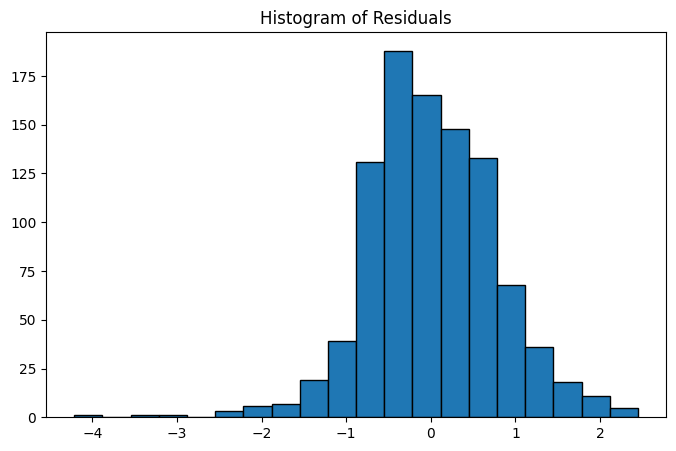

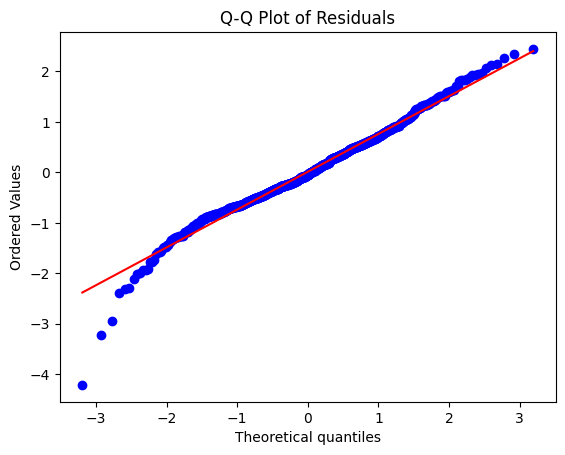

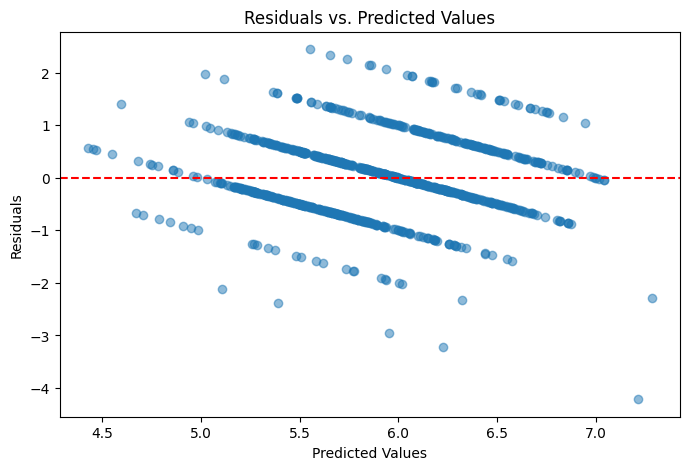

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Load the Winequality Dataset
wine_df = pd.read_csv('/content/winequality.csv', sep=';')

# Display first 5 rows
print("First 5 rows of the dataset:")
print(wine_df.head())

# Display column names and data types
print("\nColumn Names and Data Types:")
print(wine_df.dtypes)

# Summary Statistics
print("\nSummary Statistics:")
print(wine_df.describe())

# Handling Missing Values
print("\nMissing Values:")
print(wine_df.isnull().sum())

# Compute Correlation Matrix
corr_matrix = wine_df.corr()

# Create Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify Independent (X) and Dependent (y) Variables
y = wine_df['quality']
X = wine_df.drop(columns=['quality'])

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Summary
print("\nModel Coefficients:")
print(model.coef_)
print("Intercept:", model.intercept_)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute Metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
adj_r2_train = 1 - (1-r2_score(y_train, y_train_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_test = 1 - (1-r2_score(y_test, y_test_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"\nAdjusted R² (Train): {adj_r2_train:.3f}")
print(f"Adjusted R² (Test): {adj_r2_test:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

# Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor:")
print(vif_data)

# Normality of Residuals
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Histogram of Residuals")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Homoscedasticity Check
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


The Adjusted R² scores indicate that the model explains only 28.2% of the variance in wine quality for the training set and 25.7% for the test set, suggesting that many other factors influence wine quality beyond the selected features. The MSE (0.569) and RMSE (0.754) suggest moderate prediction errors, meaning the model’s estimates deviate from actual quality scores by approximately 0.75 points on average. The slight drop in Adjusted R² from train to test indicates mild overfitting, meaning the model captures some noise in the training data that doesn’t generalize well to new data. Improving the model could involve selecting more relevant features, addressing multicollinearity, or exploring non-linear relationships between variables.

As well, from the Homoscedasticity Check: Residuals vs. Predicted Values graph, it is evident that the residuals do not exhibit constant variance. The clear pattern observed around zero across the predicted values suggests variability, indicating potential heteroscedasticity in the model.

Assignment 3 - Question 2 - Task 1 and Task 2

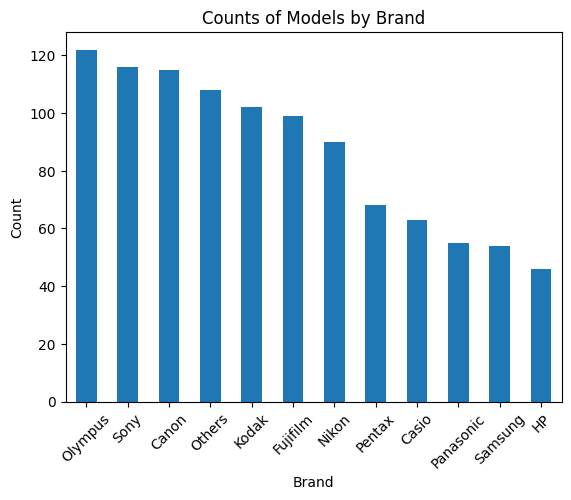

             Max resolution             Low resolution              \
                       mean         std           mean         std   
Release date                                                         
1994            1524.000000         NaN       0.000000         NaN   
1995            3060.000000         NaN       0.000000         NaN   
1996             784.000000  183.826005     448.000000  156.767344   
1997             849.454545  282.022823     378.181818  279.636127   
1998            1282.500000  387.470540     546.000000  222.288392   
1999            1470.339623  353.034698     716.075472  307.076027   
2000            1796.590164  428.047247    1049.901639  450.116196   
2001            1866.647059  469.173506    1116.611765  503.305836   
2002            2095.595506  591.016396    1390.764045  558.345079   
2003            2263.732673  447.534510    1484.653465  635.359370   
2004            2535.042553  601.480648    1836.510638  655.733544   
2005            2754

In [13]:
#TASK 1
# Load Camera Dataset
camera_df = pd.read_csv('/content/camera.csv', delimiter=',')
camera_df.columns = camera_df.columns.str.strip()

# Create a Brand column, extract brand names from the 'Model' column
camera_df['Brand'] = camera_df['Model'].apply(lambda x: str(x).split()[0])

# Name all brands that are lower than 3% in number of models as one category “others”
brand_counts = camera_df['Brand'].value_counts()
threshold = 0.03 * len(camera_df)
camera_df['Brand'] = camera_df['Brand'].apply(lambda x: 'Others' if brand_counts[x] < threshold else x)

# Use this revised dataset to develop a bar chart to show the counts of models by brand.
camera_df['Brand'].value_counts().plot(kind='bar', title='Counts of Models by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Calculate and report the mean and standard deviation values
mean_sd = camera_df.groupby('Release date').agg({'Max resolution': ['mean', 'std'],
                                                   'Low resolution': ['mean', 'std'],
                                                   'Zoom wide (W)': ['mean', 'std'],
                                                   'Zoom tele (T)': ['mean', 'std']})
print(mean_sd)


#TASK 2
# Filter numerical columns where values > 30
numerical_cols = camera_df.select_dtypes(include=['number']).columns
camera_df = camera_df[(camera_df[numerical_cols] > 30).all(axis=1)]

# Filter columns that start with 'z' or end with 'e', keeping values > 30
selected_cols = [col for col in camera_df.columns if col.startswith('z') or col.endswith('e')]
if selected_cols:
    camera_df = camera_df[(camera_df[selected_cols] > 30).all(axis=1)]

# Keep only rows where 'Price' > 350 for specific brands
selected_brands = ['Olympus', 'Sony', 'Canon', 'Kodak', 'Fujifilm']
camera_df = camera_df[(camera_df['Brand'].isin(selected_brands)) & (camera_df['Price'] > 350)]

# Save processed dataset
camera_df.to_csv('revised_camera_dataset.csv', index=False)
print("Filtered dataset saved as 'revised_camera_dataset.csv'")
